In [1]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#import dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes (tables) that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#Display the row's columns and data in dictionary format

#MEASUREMENT
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19517da2730>,
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [10]:
#STATION 
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19517da6100>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).all() [0][0]

recent_date

'2017-08-23'

In [13]:
#Parse through to turn string into datetime object
recent_year = int(recent_date[0:4])
recent_month = int(recent_date[5:7])
recent_day = int(recent_date[8:])

recent_date = dt.date(recent_year,recent_month, recent_day)

recent_date

datetime.date(2017, 8, 23)

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - dt.timedelta(days = 365) 

# Perform a query to retrieve the data and precipitation scores and sort the dataframe by date
precipitation_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_year_df = pd.DataFrame(precipitation_year)

#Set the index to the date column 
prcp_df = prcp_year_df.set_index('date', drop=True, )

prcp_df


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


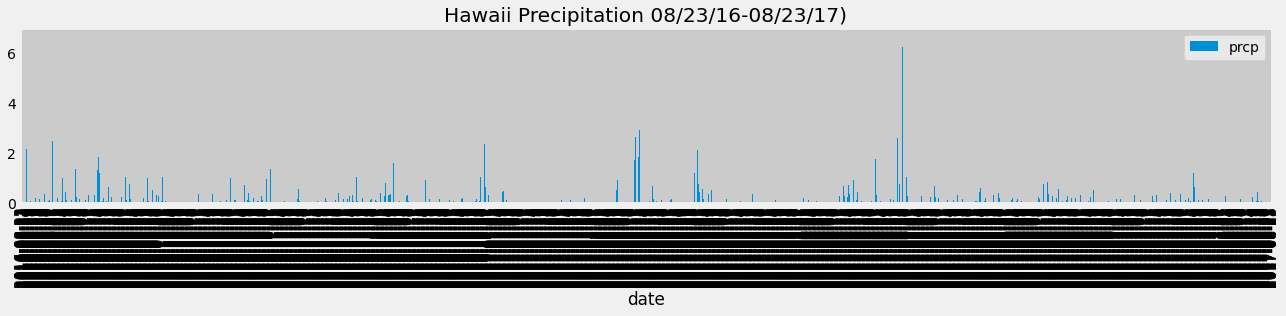

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind="bar", figsize= (20,3))
plt.title("Hawaii Precipitation 08/23/16-08/23/17)")
plt.xticks(rotation =90)
plt.show()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).group_by(Measurement.station).count()

total_stations

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
total_stations_query = session.query(Measurement.station, func.count(Measurement.station))

most_active_stations = total_stations_query.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations[0][0]

Min,Max,Avg,Station= session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), Measurement.station).filter(Measurement.station == most_active_stations[0][0]).all()[0]

print(f"For station {Station}, the min temperature is: {Min}, the max temperature is: {Max}, and the average is: {Avg} Fahrenheit")

For station USC00519281, the min temperature is: 54.0, the max temperature is: 85.0, and the average is: 71.66378066378067 Fahrenheit


In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(Measurement.station, Measurement.tobs, Measurement.date).filter(Measurement.station == Station, Measurement.date >= one_year_ago).order_by(Measurement.date).all()

Most_active_station = pd.DataFrame(most_active)
Most_active_station

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  352 non-null    object 
 1   tobs     352 non-null    float64
 2   date     352 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


In [66]:
Results = pd.to_numeric(Most_active_station["tobs"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  352 non-null    object 
 1   tobs     352 non-null    float64
 2   date     352 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


In [67]:
# plot the results as a histogram
plt.hist(Results)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

NameError: name 'Results' is not defined

# Close session

In [ ]:
# Close Session
session.close()